In [1]:
#importing
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#dataset
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/edX.csv")
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [3]:
#summarize
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [4]:
#some of the features
df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head(9)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267

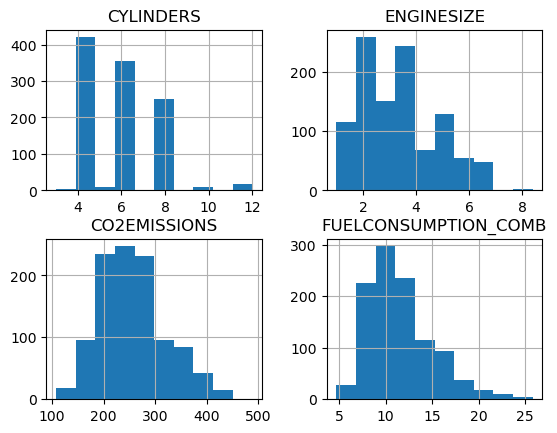

In [5]:
#plotting
plot = df1[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
plot.hist()
plt.show()

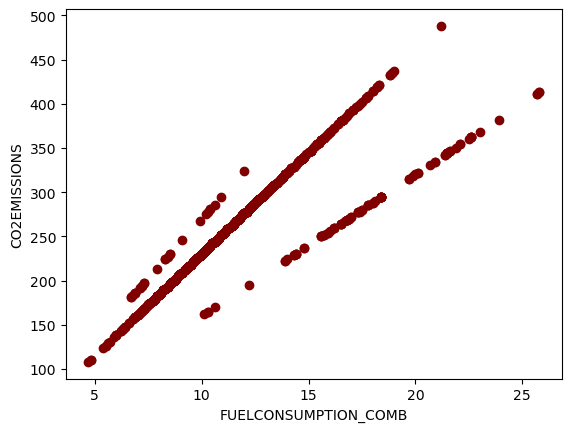

In [6]:
#fuelconsumption against emission
plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2EMISSIONS,  color='maroon')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

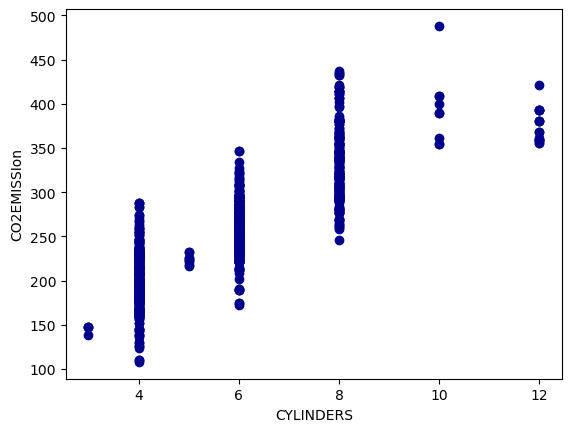

In [7]:
#cylinders against emission
plt.scatter(df1.CYLINDERS, df1.CO2EMISSIONS,  color='darkblue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIon")
plt.show()

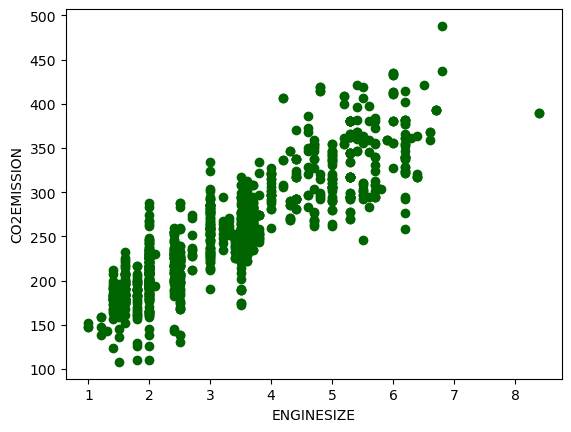

In [8]:
#enginesize against emission
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS,  color='darkgreen')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

In [9]:
#splitting
split = np.random.rand(len(df)) < 0.8
train = df1[split]
test = df1[~split]

In [10]:
#ENGINESIZE & EMISSION

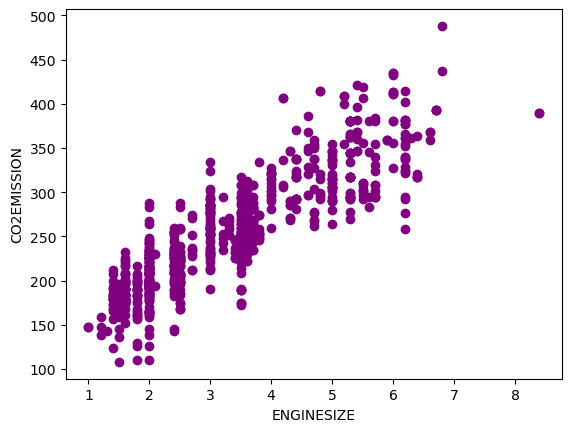

In [11]:
#training
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

In [12]:
#modelling
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg = linear_model.LinearRegression()
fit = reg.fit(train_x, train_y)
print ('Coefficients : ', fit.coef_)
print ('Intercept : ',fit.intercept_)

Coefficients :  [[39.3228169]]
Intercept :  [124.7427545]


Text(0, 0.5, 'CO2EMISSION')

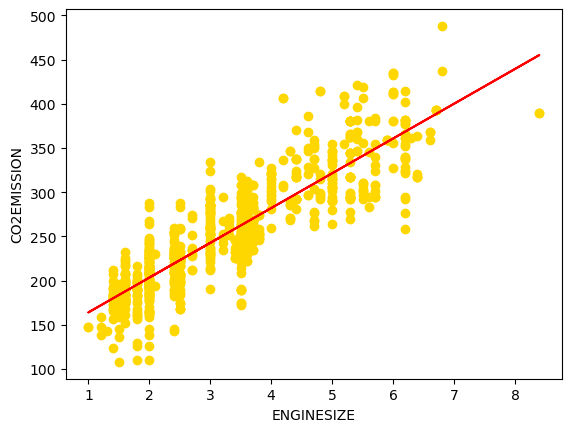

In [13]:
#plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='gold')
plt.plot(train_x, fit.coef_[0][0]*train_x + fit.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")

In [14]:
#calculations
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = fit.predict(test_x)
print("Mean Absolute Error (MAE) : %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual Sum of Squares (MSE) : %.2f" % np.mean((predict - test_y) ** 2))
print("R2 Score : %.2f" % r2_score(test_y , predict) )

Mean Absolute Error (MAE) : 23.54
Residual Sum of Squares (MSE) : 973.29
R2 Score : 0.74


In [15]:
#FUELCONSUMPTION_COMB & EMISSION

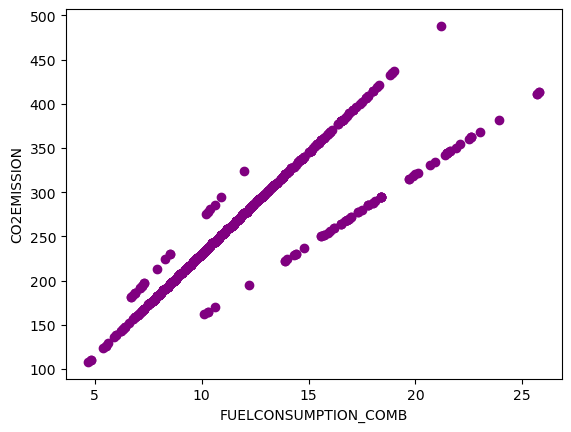

In [16]:
#training
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='purple')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

In [17]:
#modelling
from sklearn import linear_model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg = linear_model.LinearRegression()
fit = reg.fit(train_x, train_y)
print ('Coefficients : ', fit.coef_)
print ('Intercept : ',fit.intercept_)

Coefficients :  [[16.3416641]]
Intercept :  [67.01724421]


Text(0, 0.5, 'CO2EMISSION')

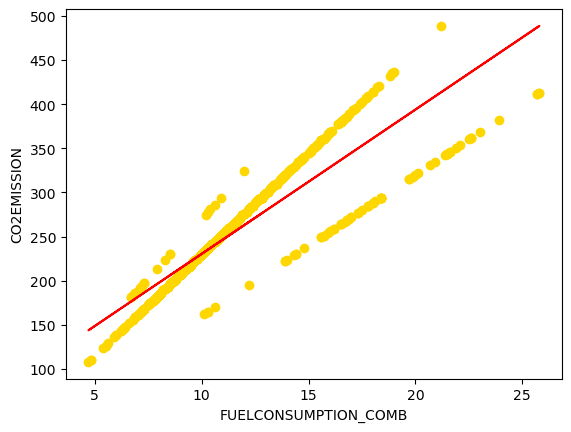

In [18]:
#plotting
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='gold')
plt.plot(train_x, fit.coef_[0][0]*train_x + fit.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSION")

In [19]:
#calculations
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = reg.predict(test_x)
print("Mean Absolute Error (MAE) : %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual Sum of Squares (MSE) : %.2f" % np.mean((predict - test_y) ** 2))
print("R2 Score : %.2f" % r2_score(test_y , predict) )

Mean Absolute Error (MAE) : 21.65
Residual Sum of Squares (MSE) : 924.98
R2 Score : 0.76


In [20]:
#CYLINDERS & EMISSION

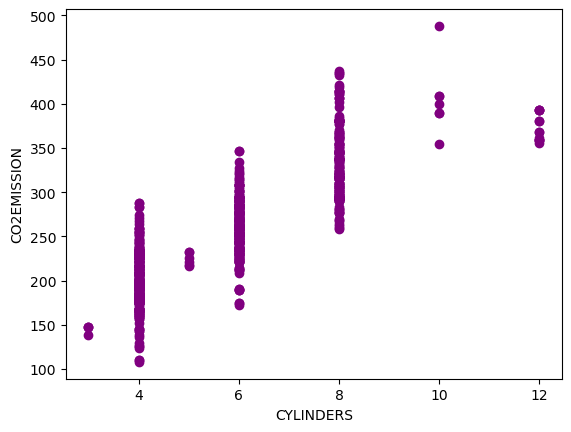

In [21]:
#training
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='purple')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSION')
plt.show()

In [22]:
#modelling
from sklearn import linear_model
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg = linear_model.LinearRegression()
fit = reg.fit(train_x, train_y)
print("Coefficients : ",fit.coef_)
print("Intercept : ",fit.intercept_)

Coefficients :  [[30.07203066]]
Intercept :  [82.34967013]


Text(0, 0.5, 'CO2EMISSION')

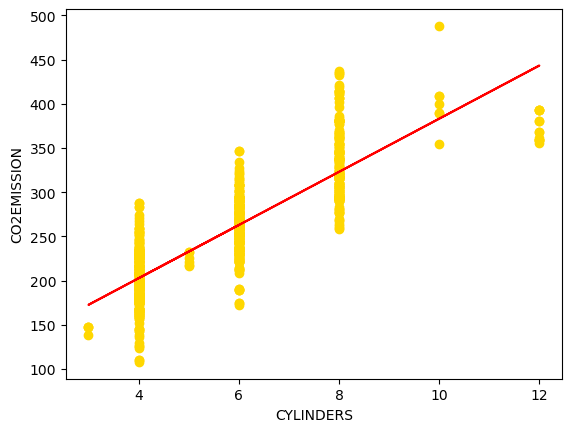

In [23]:
#plotting
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='gold')
plt.plot(train_x, fit.coef_[0][0] * train_x + fit.intercept_, '-r')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSION')

In [24]:
#calculations
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = fit.predict(test_x)
print("Mean Absolute Error (MAE) : %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual Sum of Squares (MSE) : %.2f" % np.mean(predict - test_y) ** 2)
print("R2 Score : %.2f" % r2_score(test_y, predict))

Mean Absolute Error (MAE) : 25.64
Residual Sum of Squares (MSE) : 4.39
R2 Score : 0.71
